# **Data Pre-processing**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/test_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


In [4]:
data['Application Type'] = 0 * data['AR/VR/Gaming'].astype(int) + 1 * data['Healthcare'].astype(int) + 2 * data['Industry 4.0'].astype(int) + 3 * data['IoT Devices'].astype(int) + 4 * data['Public Safety'].astype(int) + 5 * data['Smart City & Home'].astype(int) + 6 * data['Smart Transportation'].astype(int) + 7 * data['Smartphone'].astype(int)
data

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Application Type
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,6
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,22,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,6
31580,20,9,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,2
31581,8,0,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,2
31582,13,11,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,7


In [5]:
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.001000,100,0,1,1,0
1,0.000001,10,1,0,0,1
2,0.001000,50,1,0,1,0
3,0.001000,50,1,0,1,0
4,0.001000,50,0,1,0,1
...,...,...,...,...,...,...
31579,0.000001,10,1,0,0,1
31580,0.000001,10,1,0,0,1
31581,0.000001,10,1,0,0,1
31582,0.010000,75,0,1,0,1


In [6]:
y = data['Application Type']
y

0        0
1        6
2        2
3        2
4        0
        ..
31579    6
31580    2
31581    2
31582    7
31583    2
Name: Application Type, Length: 31584, dtype: int64

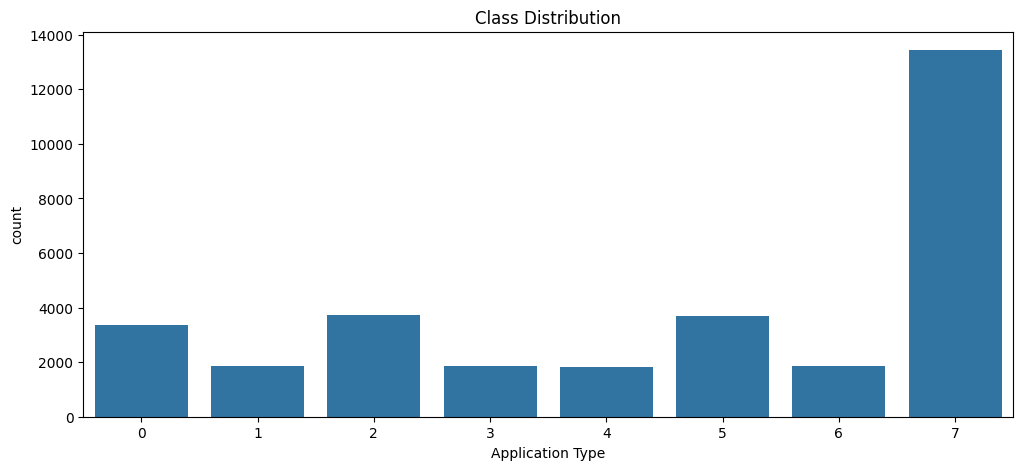

In [7]:
# Class Distribution
plt.figure(figsize=(2* len(features), 5))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
29413,0.000001,10,1,0,0,1
15104,0.010000,75,0,1,0,1
13685,0.001000,100,0,1,1,0
30141,0.010000,300,1,0,1,0
1395,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
29802,0.001000,50,0,1,0,1
5390,0.001000,50,1,0,1,0
860,0.010000,50,1,0,0,1
15795,0.010000,300,1,0,1,0


In [9]:
y_train

29413    6
15104    7
13685    7
30141    3
1395     7
        ..
29802    0
5390     2
860      5
15795    5
23654    0
Name: Application Type, Length: 28425, dtype: int64

In [10]:
X_test

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
27970,0.001000,50,1,0,1,0
4148,0.000001,10,1,0,0,1
2527,0.000001,10,1,0,0,1
29113,0.001000,150,0,1,0,1
2388,0.000001,100,0,1,1,0
...,...,...,...,...,...,...
1346,0.001000,50,1,0,1,0
1282,0.000001,100,0,1,1,0
30757,0.000001,300,0,1,0,1
2310,0.000001,60,0,1,1,0


In [11]:
y_test

27970    2
4148     4
2527     6
29113    7
2388     7
        ..
1346     2
1282     7
30757    7
2310     7
10004    0
Name: Application Type, Length: 3159, dtype: int64

In [12]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# **RANDOM FOREST CLASSIFIER**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred_RFC = model_RFC.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [17]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       321
           1       0.00      0.00      0.00       183
           2       0.39      1.00      0.56       351
           3       0.49      1.00      0.66       185
           4       0.00      0.00      0.00       182
           5       1.00      0.49      0.66       383
           6       0.00      0.00      0.00       182
           7       1.00      0.89      0.94      1372

    accuracy                           0.72      3159
   macro avg       0.44      0.55      0.45      3159
weighted avg       0.70      0.72      0.67      3159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(confusion_matrix(y_test, y_pred_RFC))

[[ 321    0    0    0    0    0    0    0]
 [   0    0  183    0    0    0    0    0]
 [   0    0  351    0    0    0    0    0]
 [   0    0    0  185    0    0    0    0]
 [   0    0  182    0    0    0    0    0]
 [   0    0    0  194    0  189    0    0]
 [   0    0  182    0    0    0    0    0]
 [ 153    0    0    0    0    0    0 1219]]


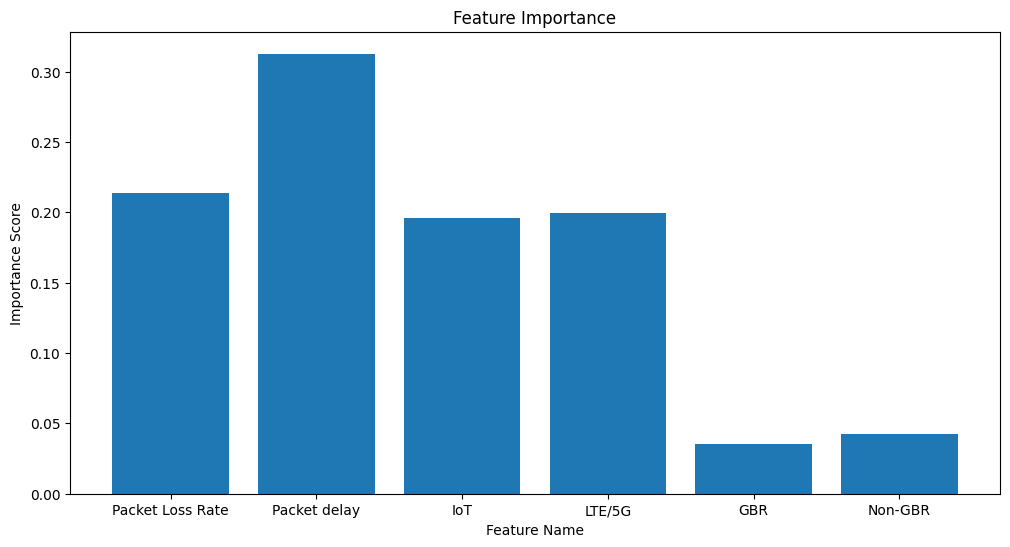

In [19]:
# Feature Importance
feature_importance = model_RFC.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.show()

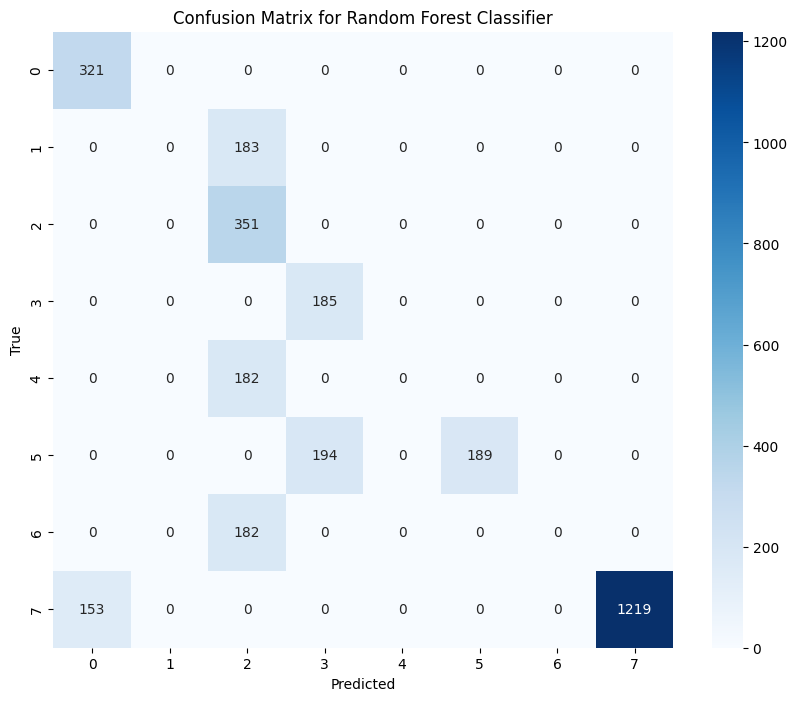

In [20]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [21]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_RFC['Actual_Application_Type'] = y_test
X_test_with_predictions_RFC['Predicted_Application_Type'] = y_pred_RFC
X_test_with_predictions_RFC

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,Actual_Application_Type,Predicted_Application_Type
0,0.001000,50,1,0,1,0,2,2
1,0.000001,10,1,0,0,1,4,2
2,0.000001,10,1,0,0,1,6,2
3,0.001000,150,0,1,0,1,7,7
4,0.000001,100,0,1,1,0,7,7
...,...,...,...,...,...,...,...,...
3154,0.001000,50,1,0,1,0,2,2
3155,0.000001,100,0,1,1,0,7,7
3156,0.000001,300,0,1,0,1,7,7
3157,0.000001,60,0,1,1,0,7,7


In [22]:
X_test_column_names

['Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR']

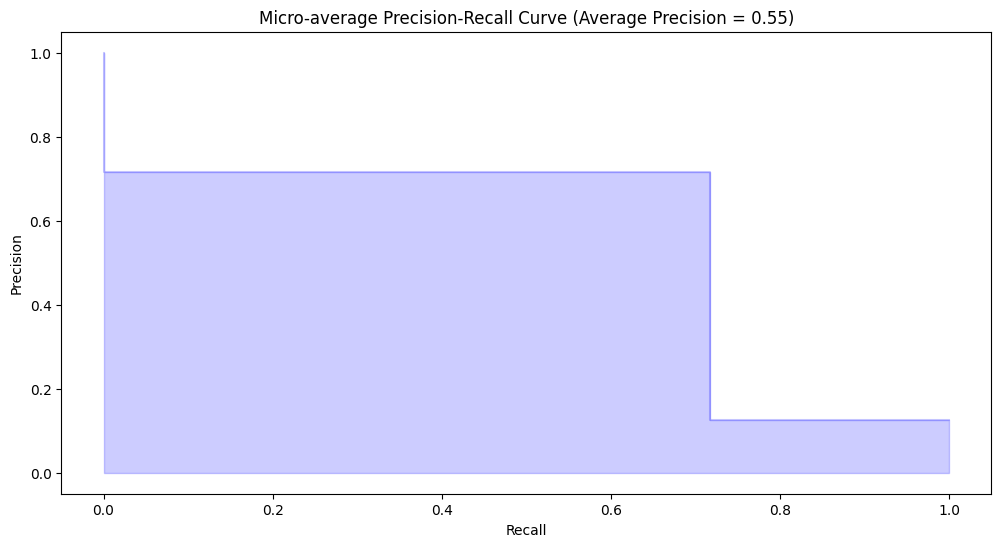

In [23]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(np.concatenate([y_test, y_pred_RFC])))
y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(np.concatenate([y_test, y_pred_RFC])))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(min(len(np.unique(y_test)), len(np.unique(y_pred_RFC)))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(2 * len(features), 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

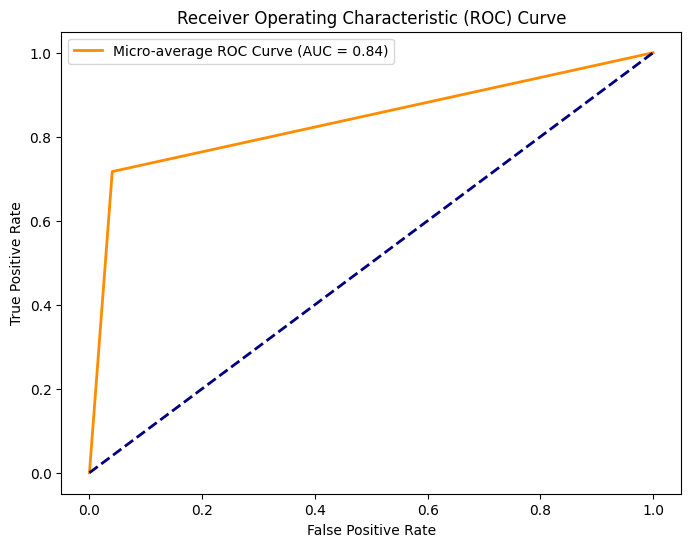

In [24]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(np.concatenate([y_test, y_pred_RFC])))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(np.concatenate([y_test, y_pred_RFC])))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model_LR.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.669832225387781


In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.25      1.00      0.41       183
           2       1.00      0.51      0.67       351
           3       0.00      0.00      0.00       185
           4       0.00      0.00      0.00       182
           5       0.67      1.00      0.81       383
           6       0.00      0.00      0.00       182
           7       0.81      1.00      0.90      1372

    accuracy                           0.67      3159
   macro avg       0.34      0.44      0.35      3159
weighted avg       0.56      0.67      0.58      3159

[[   0    0    0    0    0    0    0  321]
 [   0  183    0    0    0    0    0    0]
 [   0  173  178    0    0    0    0    0]
 [   0    0    0    0    0  185    0    0]
 [   0  182    0    0    0    0    0    0]
 [   0    0    0    0    0  383    0    0]
 [   0  182    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1372]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions['Actual_Application_Type'] = y_test
X_test_with_predictions['Predicted_Application_Type'] = y_pred
X_test_with_predictions

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,Actual_Application_Type,Predicted_Application_Type
0,0.001000,50,1,0,1,0,2,2
1,0.000001,10,1,0,0,1,4,1
2,0.000001,10,1,0,0,1,6,1
3,0.001000,150,0,1,0,1,7,7
4,0.000001,100,0,1,1,0,7,7
...,...,...,...,...,...,...,...,...
3154,0.001000,50,1,0,1,0,2,2
3155,0.000001,100,0,1,1,0,7,7
3156,0.000001,300,0,1,0,1,7,7
3157,0.000001,60,0,1,1,0,7,7


# **Naive Bayes**

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = model_NB.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6043051598607154


In [35]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       321
           1       0.25      1.00      0.41       183
           2       1.00      0.51      0.67       351
           3       0.49      1.00      0.66       185
           4       0.00      0.00      0.00       182
           5       1.00      0.49      0.66       383
           6       0.00      0.00      0.00       182
           7       1.00      0.62      0.77      1372

    accuracy                           0.60      3159
   macro avg       0.52      0.58      0.46      3159
weighted avg       0.75      0.60      0.61      3159

[[321   0   0   0   0   0   0   0]
 [  0 183   0   0   0   0   0   0]
 [  0 173 178   0   0   0   0   0]
 [  0   0   0 185   0   0   0   0]
 [  0 182   0   0   0   0   0   0]
 [  0   0   0 194   0 189   0   0]
 [  0 182   0   0   0   0   0   0]
 [519   0   0   0   0   0   0 853]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions['Actual_Application_Type'] = y_test
X_test_with_predictions['Predicted_Application_Type'] = y_pred
X_test_with_predictions

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,Actual_Application_Type,Predicted_Application_Type
0,0.001000,50,1,0,1,0,2,2
1,0.000001,10,1,0,0,1,4,1
2,0.000001,10,1,0,0,1,6,1
3,0.001000,150,0,1,0,1,7,7
4,0.000001,100,0,1,1,0,7,0
...,...,...,...,...,...,...,...,...
3154,0.001000,50,1,0,1,0,2,2
3155,0.000001,100,0,1,1,0,7,0
3156,0.000001,300,0,1,0,1,7,7
3157,0.000001,60,0,1,1,0,7,0


# **KNN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Choose the number of neighbors (e.g., 3, 5, 7)
k = 5
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = model_KNN.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7154162709718265


In [41]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       321
           1       0.25      1.00      0.41       183
           2       1.00      0.51      0.67       351
           3       0.49      1.00      0.66       185
           4       0.00      0.00      0.00       182
           5       1.00      0.49      0.66       383
           6       0.00      0.00      0.00       182
           7       0.89      1.00      0.94      1372

    accuracy                           0.72      3159
   macro avg       0.58      0.56      0.50      3159
weighted avg       0.76      0.72      0.69      3159

[[ 153    0    0    0    0    0    0  168]
 [   0  183    0    0    0    0    0    0]
 [   0  173  178    0    0    0    0    0]
 [   0    0    0  185    0    0    0    0]
 [   0  182    0    0    0    0    0    0]
 [   0    0    0  194    0  189    0    0]
 [   0  182    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1372]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions['Actual_Application_Type'] = y_test
X_test_with_predictions['Predicted_Application_Type'] = y_pred
X_test_with_predictions

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,Actual_Application_Type,Predicted_Application_Type
0,0.001000,50,1,0,1,0,2,2
1,0.000001,10,1,0,0,1,4,1
2,0.000001,10,1,0,0,1,6,1
3,0.001000,150,0,1,0,1,7,7
4,0.000001,100,0,1,1,0,7,7
...,...,...,...,...,...,...,...,...
3154,0.001000,50,1,0,1,0,2,2
3155,0.000001,100,0,1,1,0,7,7
3156,0.000001,300,0,1,0,1,7,7
3157,0.000001,60,0,1,1,0,7,7


# **Support Vector Machine**

In [43]:
from sklearn.svm import SVC

In [ ]:
# Types of SVM (linear, polynomial, radial basis function, etc.)
# Here, we use a linear kernel for simplicity
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

In [ ]:
y_pred = model_SVM.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions['Actual_Application_Type'] = y_test
X_test_with_predictions['Predicted_Application_Type'] = y_pred
X_test_with_predictions

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

In [ ]:
y_pred = model_DT.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='Predicted_Application_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions['Actual_Application_Type'] = y_test
X_test_with_predictions['Predicted_Application_Type'] = y_pred
X_test_with_predictions

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp2 - Device_Classification_SupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'